Text(0,0.5,'flux')

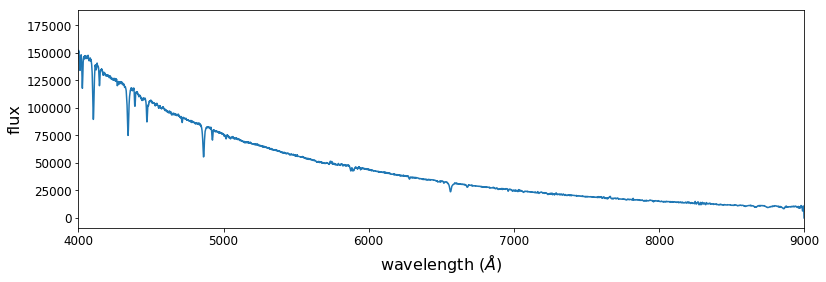

In [10]:
# measure the redshift from an absorption line
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
import astropy.io.fits as fits
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

#read the spectrum from FITS file
filename = '351110104.fits'
tchfits = fits.open(filename)
log_wv0 = tchfits[0].header['CRVAL1']
log_dwv = tchfits[0].header['CD1_1']

sp = tchfits[0].data

N = len(sp[0,:])
wv = 10**(log_wv0+np.arange(0,N,1)*log_dwv)

fig = plt.figure(figsize=[13,4])
ax = fig.add_subplot(111)
ax.plot(wv,sp[0,:])
ax.set_xlim([4000,9000])
ax.set_xlabel('wavelength $(\AA)$',fontsize=16)
ax.set_ylabel('flux',fontsize=16)

Text(0.5,1,'H$_{\\delta}$')

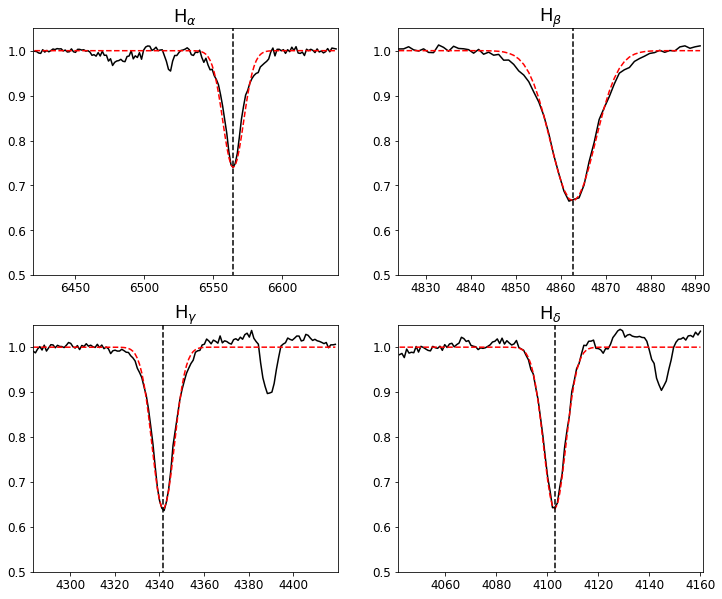

In [2]:
#center wavelengths of spectral lines with velocity = 0
Ha_0 = 6564.6
Hb_0 = 4862.71
Hg_0 = 4341.69
Hd_0 = 4102.89

#continuum parts of each spectral line used for normalization，left:cont[0]~cont[1] & right: cont[2]~cont[3]
Ha_cont = [6420.00,6455.00,6600.00,6640.00]
Hb_cont = [4823.875,4847.875,4876.625,4891.625]
Hg_cont = [4283.50,4319.75,4367.25,4419.75]
Hd_cont = [4041.60,4079.75,4128.50,4161.00]

#normalize the spectrum around the spectral line according to continuum parts
def normSpec(wv,sp,cont):
    ind_cont1 = (wv>=cont[0]) & (wv<=cont[1])   #continuum part on the left
    ind_cont2 = (wv>=cont[2]) & (wv<=cont[3])   #continuum part on the right
    fc1 = np.mean(sp[ind_cont1])                #average wavelength of the left continuum part
    wv1 = np.mean(wv[ind_cont1])                #average flux of the left continuum part
    fc2 = np.mean(sp[ind_cont2])                #average wavelength of the right continuum part
    wv2 = np.mean(wv[ind_cont2])                #average flux of the right continuum part
    fc = (fc2-fc1)/(wv2-wv1)*(wv-wv1)+fc1       #the straight baseline of continuum for normalization 
    normsp = sp/fc                              #normalize the spectrum
    return normsp

#spectral line part looks like a upside-down normal distribution
def gauss(x,A,mu,sig):
    return 1.-A*np.exp(-(x-mu)**2/(2*sig**2))

#normalize Halpha
normsp_Ha = normSpec(wv,sp[0,:],Ha_cont)
ind_Ha = (wv>=Ha_cont[0]) & (wv<=Ha_cont[3])
normsp_Ha = normsp_Ha[ind_Ha]
wv_Ha = wv[ind_Ha]
#normalize Hbeta
normsp_Hb = normSpec(wv,sp[0,:],Hb_cont)
ind_Hb = (wv>=Hb_cont[0]) & (wv<=Hb_cont[3])
normsp_Hb = normsp_Hb[ind_Hb]
wv_Hb = wv[ind_Hb]
#normalize Hgamma
normsp_Hg = normSpec(wv,sp[0,:],Hg_cont)
ind_Hg = (wv>=Hg_cont[0]) & (wv<=Hg_cont[3])
normsp_Hg = normsp_Hg[ind_Hg]
wv_Hg = wv[ind_Hg]
#normalize Hdelta
normsp_Hd = normSpec(wv,sp[0,:],Hd_cont)
ind_Hd = (wv>=Hd_cont[0]) & (wv<=Hd_cont[3])
normsp_Hd = normsp_Hd[ind_Hd]
wv_Hd = wv[ind_Hd]

#depict the normalized 4 spectral lines
fig = plt.figure(figsize=[12,10])
#Halpha
ax = fig.add_subplot(221)
ax.plot(wv_Ha,normsp_Ha,'k-')                 #normalized spectrum
y = gauss(wv_Ha,0.26,Ha_0,7.5)
ax.plot(wv_Ha,y,'r--')                        #approximate normal distribution
ax.plot([Ha_0,Ha_0],[0.,1.1],'k--')           #note the center wavelength of velocity 0
ax.set_ylim([0.5,1.05])
ax.set_xlim([Ha_cont[0],Ha_cont[3]])
ax.set_title(r'H$_{\alpha}$',fontsize=18)
#Hbeta
ax = fig.add_subplot(222)
ax.plot(wv_Hb,normsp_Hb,'k-')                 #normalized spectrum
y = gauss(wv_Hb,0.335,Hb_0,5.0)
ax.plot(wv_Hb,y,'r--')                        #approximate normal distribution
ax.plot([Hb_0,Hb_0],[0.0,1.1],'k--')          #note the center wavelength of velocity 0
ax.set_ylim([0.5,1.05])
ax.set_xlim([Hb_cont[0],Hb_cont[3]])
ax.set_title(r'H$_{\beta}$',fontsize=18)
#Hgamma
ax = fig.add_subplot(223)
ax.plot(wv_Hg,normsp_Hg,'k-')                 #normalized spectrum
y = gauss(wv_Hg,0.36,Hg_0,5.0)
ax.plot(wv_Hg,y,'r--')                        #approximate normal distribution
ax.plot([Hg_0,Hg_0],[0.0,1.1],'k--')          #note the center wavelength of velocity 0
ax.set_ylim([0.5,1.05])
ax.set_xlim([Hg_cont[0],Hg_cont[3]])
ax.set_title(r'H$_{\gamma}$',fontsize=18)
#Hdelta
ax = fig.add_subplot(224)
ax.plot(wv_Hd,normsp_Hd,'k-')                 #normalized spectrum
y = gauss(wv_Hd,0.36,Hd_0,4.4)
ax.plot(wv_Hd,y,'r--')                        #approximate normal distribution
ax.plot([Hd_0,Hd_0],[0.0,1.1],'k--')          #note the center wavelength of velocity 0
ax.set_ylim([0.5,1.05])
ax.set_xlim([Hd_cont[0],Hd_cont[3]])
ax.set_title(r'H$_{\delta}$',fontsize=18)

mean wavelength = 4862.504
std wavelength = 5.978
shift Delta lambda/lambda = -0.00004238
velocity = -12.715 km/s
std line width = 368.776 km/s

mean wavelength = 4862.485
std wavelength = 6.019
shift Delta lambda/lambda = -0.00004626
velocity = -13.877 km/s
std line width = 371.360 km/s

mean wavelength = 4862.495
std wavelength = 6.039
shift Delta lambda/lambda = -0.00004428
velocity = -13.284 km/s
std line width = 372.557 km/s


mean vel = -12.229+/-2.266


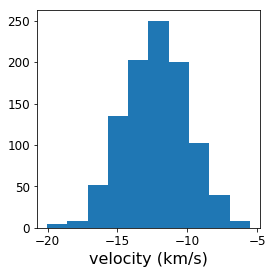

In [3]:
#random sampling for Hbeta

#from 4840 to 4891.625
y = 1.-normsp_Hb[(wv_Hb>4840.)]
x = wv_Hb[(wv_Hb>4840.)]

N = 100000                      #number of samples each time

M = 1000                        #times of rejection sampling
vlos_mc_Hb = np.zeros((M,1))    #store the results of samplings: velocity

#rejection sampling process
for m in range(M):
    x_s0 = np.random.uniform(x[0],x[-1],N)           #g(x) generate x
    y_s0 = np.random.uniform(0.0,np.max(y),N)        #random number y as rejection basis
    y_x = np.interp(x_s0,x,y)                        #f(x)
    x_s = x_s0[y_s0<=y_x]                            #accept the samples satisfying y<=f(x) 
    #show the results of first three times of sampling
    if m<3:
        print ('mean wavelength = %(m).3f' % {'m': np.mean(x_s)})                       #mean of accepted samples
        print ('std wavelength = %(m).3f' % {'m': np.std(x_s)})                         #standard deviation of kept samples
        print ('shift Delta lambda/lambda = %(m).8f' % {'m': (np.mean(x_s)-Hb_0)/Hb_0}) #redshift
        print ('velocity = %(m).3f km/s' % {'m': (np.mean(x_s)-Hb_0)/Hb_0*300000.0})    #velocity
        print ('std line width = %(m).3f km/s\n' % {'m': (np.std(x_s))/Hb_0*300000.0})  #standard deviation of velocity
    vlos_mc_Hb[m] = (np.mean(x_s)-Hb_0)/Hb_0*300000.0 #store the velocity      
#show the results of M times of sampling
fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.hist(vlos_mc_Hb,10)
ax.set_xlabel('velocity (km/s)',fontsize=16)
print ('\nmean vel = %(m).3f+/-%(d).3f' % {'m': np.mean(vlos_mc_Hb), 'd': np.std(vlos_mc_Hb)})

mean wavelength = 6564.472
std wavelength = 4.541
shift Delta lambda/lambda = -0.00001953
velocity = -5.860 km/s
std line width = 207.504 km/s

mean wavelength = 6564.503
std wavelength = 4.542
shift Delta lambda/lambda = -0.00001481
velocity = -4.443 km/s
std line width = 207.582 km/s

mean wavelength = 6564.501
std wavelength = 4.558
shift Delta lambda/lambda = -0.00001508
velocity = -4.524 km/s
std line width = 208.318 km/s


mean vel = -4.705+/-0.765


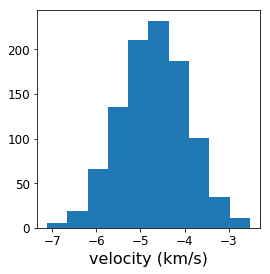

In [4]:
#random sampling for Halpha

#from 6555 to 6575
y = 1.-normsp_Ha[(wv_Ha>6555.) & (wv_Ha<6575.)]
x = wv_Ha[(wv_Ha>6555.) & (wv_Ha<6575.)]

N = 100000                      #number of samples each time

M = 1000                        #times of rejection sampling
vlos_mc_Ha = np.zeros((M,1))    #store the results of samplings: velocity

#rejection sampling process
for m in range(M):
    x_s0 = np.random.uniform(x[0],x[-1],N)          #g(x) generate x
    y_s0 = np.random.uniform(0.0,np.max(y),N)       #random number y as rejection basis
    y_x = np.interp(x_s0,x,y)                       #f(x)
    x_s = x_s0[y_s0<=y_x]                           #accept the samples satisfying y<=f(x) 
    #show the results of first three times of sampling
    if m<3:
        print ('mean wavelength = %(m).3f' % {'m': np.mean(x_s)})
        print ('std wavelength = %(m).3f' % {'m': np.std(x_s)})
        print ('shift Delta lambda/lambda = %(m).8f' % {'m': (np.mean(x_s)-Ha_0)/Ha_0})
        print ('velocity = %(m).3f km/s' % {'m': (np.mean(x_s)-Ha_0)/Ha_0*300000.0})
        print ('std line width = %(m).3f km/s\n' % {'m': (np.std(x_s))/Ha_0*300000.0})
    vlos_mc_Ha[m] = (np.mean(x_s)-Ha_0)/Ha_0*300000.0  #store the velocity

#show the results of M times of sampling
fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.hist(vlos_mc_Ha,10)
ax.set_xlabel('velocity (km/s)',fontsize=16)
print ('\nmean vel = %(m).3f+/-%(d).3f' % {'m': np.mean(vlos_mc_Ha), 'd': np.std(vlos_mc_Ha)})

mean wavelength = 4341.525
std wavelength = 5.841
shift Delta lambda/lambda = -0.00003800
velocity = -11.400 km/s
std line width = 403.628 km/s

mean wavelength = 4341.482
std wavelength = 5.815
shift Delta lambda/lambda = -0.00004795
velocity = -14.386 km/s
std line width = 401.780 km/s

mean wavelength = 4341.494
std wavelength = 5.831
shift Delta lambda/lambda = -0.00004503
velocity = -13.509 km/s
std line width = 402.915 km/s


mean vel = -10.055+/-2.560


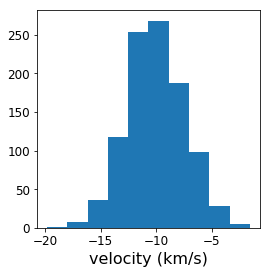

In [5]:
#random sampling for Hgamma

#from 4320 to 4370
y = 1.-normsp_Hg[(wv_Hg<4370.) & (wv_Hg>4320.)]
x = wv_Hg[(wv_Hg<4370.) & (wv_Hg>4320.)]

N = 100000                      #number of samples each time

M = 1000                        #times of rejection sampling
vlos_mc_Hg = np.zeros((M,1))       #store the results of samplings: velocity

#rejection sampling process
for m in range(M):
    x_s0 = np.random.uniform(x[0],x[-1],N)           #g(x) generate x
    y_s0 = np.random.uniform(0.0,np.max(y),N)        #random number y as rejection basis
    y_x = np.interp(x_s0,x,y)                        #f(x)
    x_s = x_s0[y_s0<=y_x]                            #accept the samples satisfying y<=f(x) 
    #show the results of first three times of sampling
    if m<3:
        print ('mean wavelength = %(m).3f' % {'m': np.mean(x_s)})
        print ('std wavelength = %(m).3f' % {'m': np.std(x_s)})
        print ('shift Delta lambda/lambda = %(m).8f' % {'m': (np.mean(x_s)-Hg_0)/Hg_0})
        print ('velocity = %(m).3f km/s' % {'m': (np.mean(x_s)-Hg_0)/Hg_0*300000.0})
        print ('std line width = %(m).3f km/s\n' % {'m': (np.std(x_s))/Hg_0*300000.0})
    vlos_mc_Hg[m] = (np.mean(x_s)-Hg_0)/Hg_0*300000.0 #store the velocity
#show the results of M times of sampling
fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.hist(vlos_mc_Hg,10)
ax.set_xlabel('velocity (km/s)',fontsize=16)
print ('\nmean vel = %(m).3f+/-%(d).3f' % {'m': np.mean(vlos_mc_Hg), 'd': np.std(vlos_mc_Hg)})

mean wavelength = 4102.664
std wavelength = 4.342
shift Delta lambda/lambda = -0.00005502
velocity = -16.506 km/s
std line width = 317.497 km/s

mean wavelength = 4102.703
std wavelength = 4.301
shift Delta lambda/lambda = -0.00004550
velocity = -13.651 km/s
std line width = 314.473 km/s

mean wavelength = 4102.726
std wavelength = 4.315
shift Delta lambda/lambda = -0.00003999
velocity = -11.998 km/s
std line width = 315.483 km/s


mean vel = -13.017+/-1.868


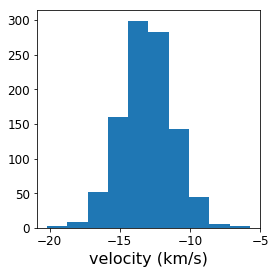

In [6]:
#random sampling for Hdelta

#from 4080 to 4119
y = 1.-normsp_Hd[(wv_Hd<4119.) & (wv_Hd>4080.)]
x = wv_Hd[(wv_Hd<4119.) & (wv_Hd>4080.)]

N = 100000                      #number of samples each time

M = 1000                        #times of rejection sampling
vlos_mc_Hd = np.zeros((M,1))       #store the results of samplings: velocity

#rejection sampling process
for m in range(M):
    x_s0 = np.random.uniform(x[0],x[-1],N)          #g(x) generate x
    y_s0 = np.random.uniform(0.0,np.max(y),N)       #random number y as rejection basis
    y_x = np.interp(x_s0,x,y)                       #f(x)
    x_s = x_s0[y_s0<=y_x]                           #accept the samples satisfying y<=f(x) 
    #show the results of first three times of sampling
    if m<3:
        print ('mean wavelength = %(m).3f' % {'m': np.mean(x_s)})
        print ('std wavelength = %(m).3f' % {'m': np.std(x_s)})
        print ('shift Delta lambda/lambda = %(m).8f' % {'m': (np.mean(x_s)-Hd_0)/Hd_0})
        print ('velocity = %(m).3f km/s' % {'m': (np.mean(x_s)-Hd_0)/Hd_0*300000.0})
        print ('std line width = %(m).3f km/s\n' % {'m': (np.std(x_s))/Hd_0*300000.0})
    vlos_mc_Hd[m] = (np.mean(x_s)-Hd_0)/Hd_0*300000.0  #store the velocity
#show the results of M times of sampling
fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.hist(vlos_mc_Hd,10)
ax.set_xlabel('velocity (km/s)',fontsize=16)
print ('\nmean vel = %(m).3f+/-%(d).3f' % {'m': np.mean(vlos_mc_Hd), 'd': np.std(vlos_mc_Hd)})

(-22, 5)

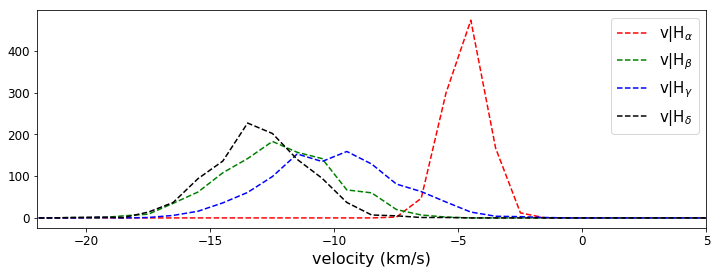

In [7]:
#show the histrogram of sampling
vgrid = np.arange(-200,200,1)
vcenter = (vgrid[1:]+vgrid[0:-1])/2.
h_Ha,xedge = np.histogram(vlos_mc_Ha, vgrid)
h_Hb,xedge = np.histogram(vlos_mc_Hb, vgrid)
h_Hg,xedge = np.histogram(vlos_mc_Hg, vgrid)
h_Hd,xedge = np.histogram(vlos_mc_Hd, vgrid)

fig = plt.figure(figsize=[12,4])
ax = fig.add_subplot(111)
ax.plot(vcenter,h_Ha,'r--',label=r'v|H$_{\alpha}$')
ax.plot(vcenter,h_Hb,'g--',label=r'v|H$_{\beta}$')
ax.plot(vcenter,h_Hg,'b--',label=r'v|H$_{\gamma}$')
ax.plot(vcenter,h_Hd,'k--',label=r'v|H$_{\delta}$')
ax.set_xlabel('velocity (km/s)',fontsize=16)
ax.legend(fontsize=15)
ax.set_xlim((-22,5))

Text(0.5,0,'velocity (km/s)')

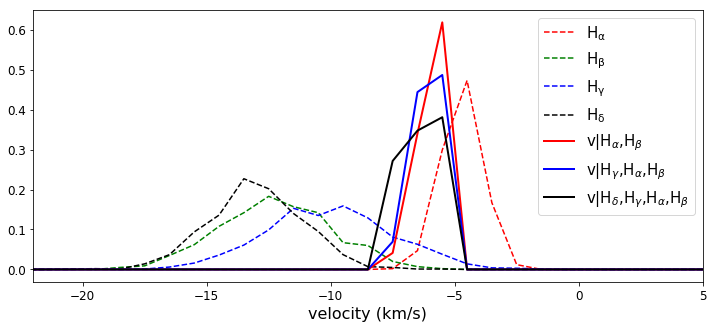

In [8]:
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111)
#show the histrogram of sampling
ax.plot(vcenter,h_Ha/np.float(np.sum(h_Ha)),'r--',label=r'$\rm H_{\alpha}$')
ax.plot(vcenter,h_Hb/np.float(np.sum(h_Hb)),'g--',label=r'$\rm H_{\beta}$')
ax.plot(vcenter,h_Hg/np.float(np.sum(h_Hg)),'b--',label=r'$\rm H_{\gamma}$')
ax.plot(vcenter,h_Hd/np.float(np.sum(h_Hd)),'k--',label=r'$\rm H_{\delta}$')

#combine the 4 results
#post: alpha, prior: beta        
ax.plot(vcenter, h_Ha*h_Hb/np.float(np.sum(h_Hb*h_Ha)),'r-',linewidth=2,label=r'v|H$_{\alpha}$,H$_{\beta}$')
#post: gamma, prior: beta, alpha
ax.plot(vcenter, h_Hg*h_Ha*h_Hb/np.float(np.sum(h_Hg*h_Ha*h_Hb)),'b-',linewidth=2,label=r'v|H$_{\gamma}$,H$_{\alpha}$,H$_{\beta}$')
#post: delta, prior: beta, alpha, gamma        
ax.plot(vcenter, h_Ha*h_Hd*h_Hg*h_Hb/np.float(np.sum(h_Hb*h_Hg*h_Hd*h_Ha)),'k-',linewidth=2,label=r'v|H$_{\delta}$,H$_{\gamma}$,H$_{\alpha}$,H$_{\beta}$')
        

ax.legend(fontsize=15)
ax.set_xlim((-22,5))
ax.set_xlabel('velocity (km/s)',fontsize=16)